# Credit Card Fraud Detection Project
This project analyzes credit card transactions to detect fraudulent activities using machine learning techniques. It includes data preprocessing, SMOTE balancing, correlation analysis, fraud pattern analysis, and model evaluation.

# Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

from imblearn.over_sampling import SMOTE

# Step 2: Load the Dataset

In [2]:
df = pd.read_csv('creditcard.csv')
print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 3: Explore Dataset Structure

In [3]:
print(df.info())
print(df['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Step 4: Correlation Analysis
We visualize the correlation matrix to identify any highly correlated features.

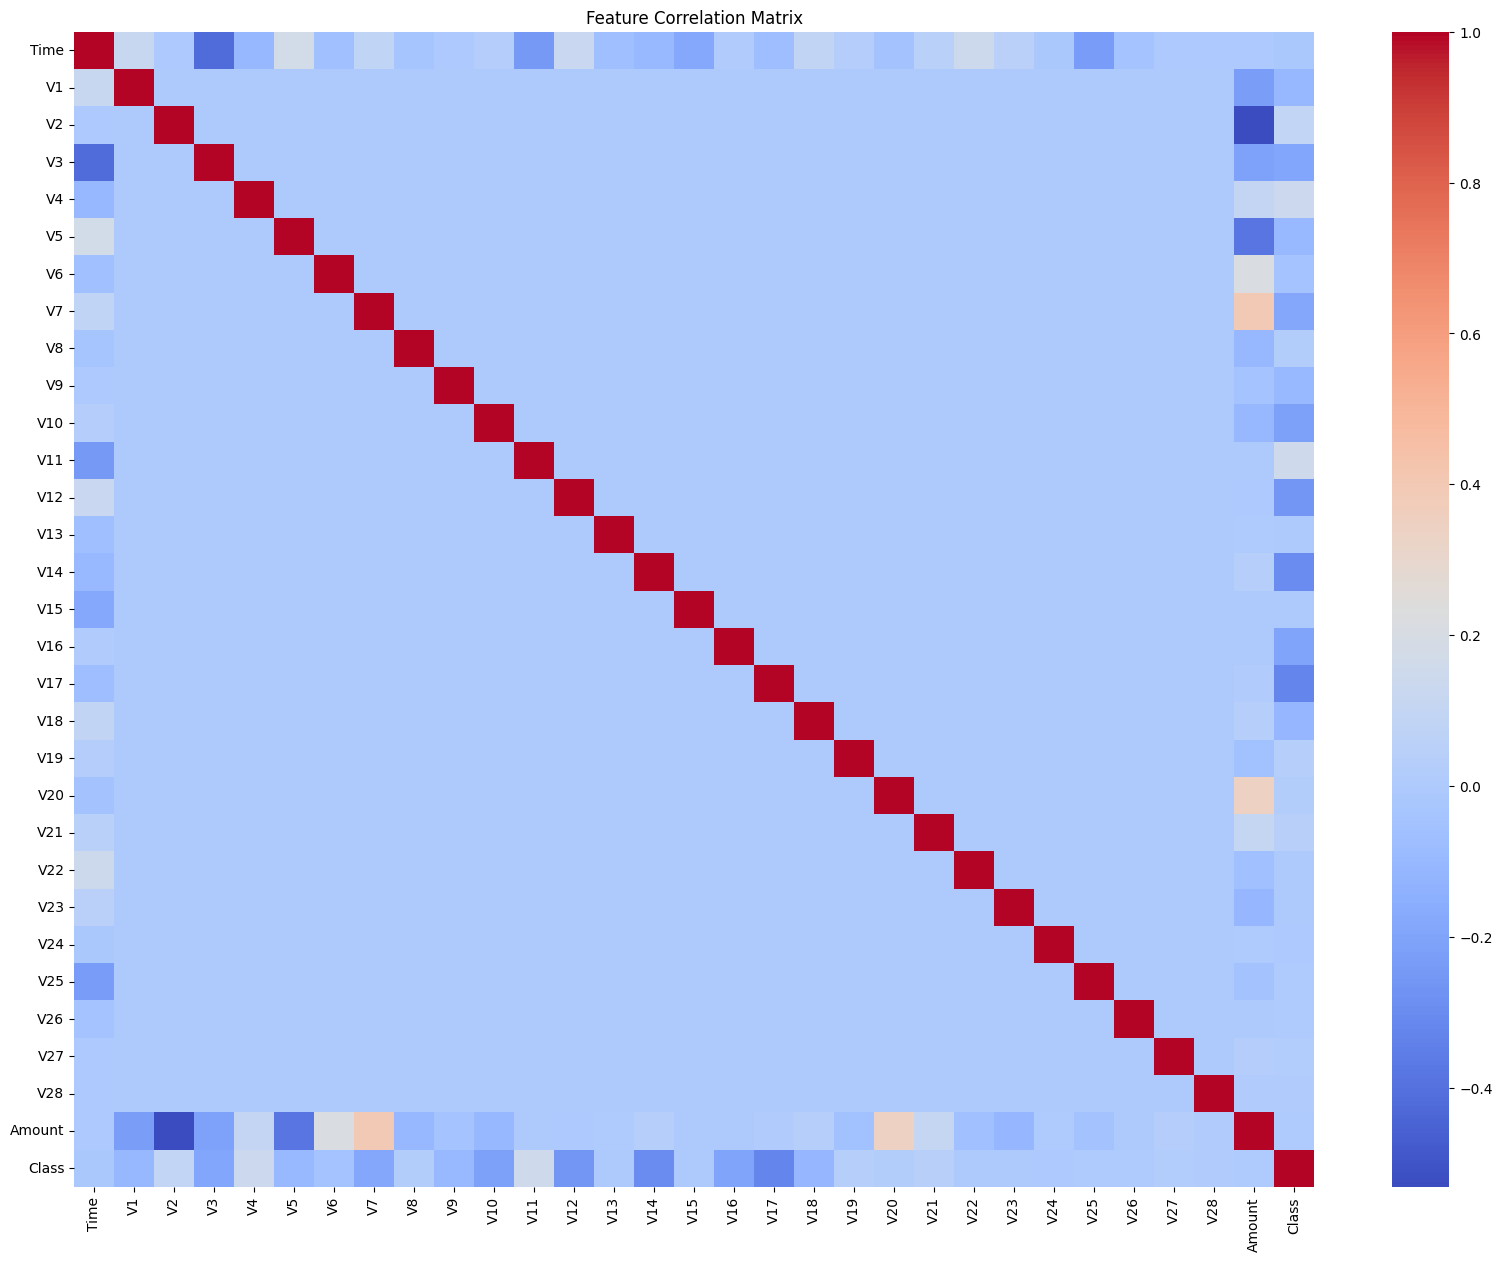

Highly correlated feature pairs (corr > 0.9):


In [4]:
plt.figure(figsize=(20, 15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

# Find and print correlated pairs
threshold = 0.9
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = [(a, b) for (a, b) in corr_pairs.index if a != b and corr_matrix.loc[a, b] > threshold]

print("Highly correlated feature pairs (corr > 0.9):")
for a, b in high_corr:
    print(f"{a} - {b}: {corr_matrix.loc[a, b]:.2f}")

# Step 5: Analyze Fraud Patterns Based on Transaction Amount

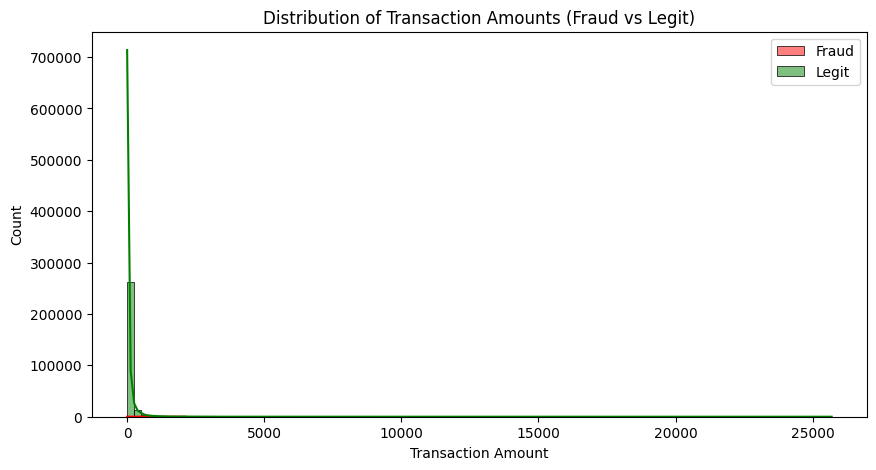


Top 10 transaction amounts in fraud cases:
Amount
1.00     113
99.99     27
0.00      27
0.76      17
0.77      10
0.01       5
2.00       4
3.79       4
12.31      3
1.18       3
Name: count, dtype: int64


In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df[df['Class'] == 1], x='Amount', bins=100, color='red', label='Fraud', kde=True)
sns.histplot(data=df[df['Class'] == 0], x='Amount', bins=100, color='green', label='Legit', kde=True)
plt.legend()
plt.title("Distribution of Transaction Amounts (Fraud vs Legit)")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

top_fraud_amounts = df[df['Class'] == 1]['Amount'].round(2).value_counts().head(10)
print("\nTop 10 transaction amounts in fraud cases:")
print(top_fraud_amounts)

# Step 6: Time Series Analysis (Hourly Fraud Trends)

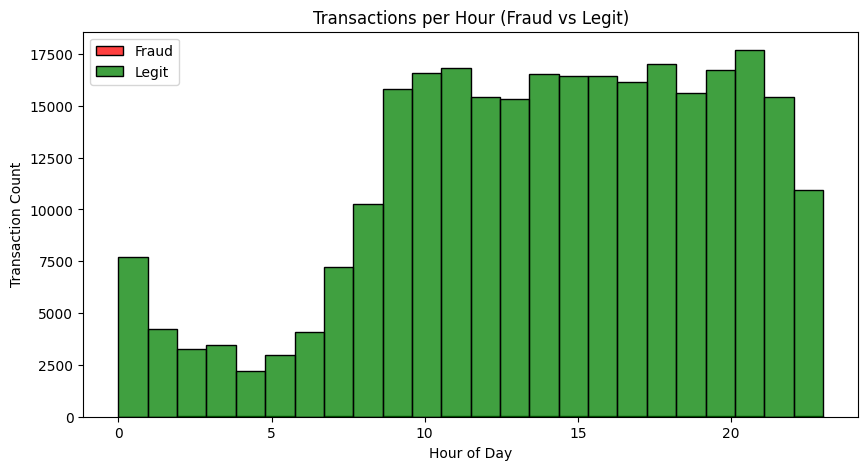

In [6]:
df['Hour'] = (df['Time'] / 3600).apply(np.floor) % 24

plt.figure(figsize=(10, 5))
sns.histplot(df[df['Class'] == 1]['Hour'], bins=24, color='red', label='Fraud', kde=False)
sns.histplot(df[df['Class'] == 0]['Hour'], bins=24, color='green', label='Legit', kde=False)
plt.title("Transactions per Hour (Fraud vs Legit)")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.legend()
plt.show()

# Step 7: Preprocess Data (Scale Time & Amount)

In [7]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Handle Class Imbalance using SMOTE

In [8]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE class distribution:")
print(pd.Series(y_train_smote).value_counts())

After SMOTE class distribution:
Class
0    227451
1    227451
Name: count, dtype: int64


# Step 9: Train Random Forest Classifier

In [9]:
print("Training Random Forest... please wait")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)
print("Random Forest training completed.")

Training Random Forest... please wait
Random Forest training completed.


# Step 10: Evaluate Model Performance

In [10]:
y_pred = rf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
 [[56853    11]
 [   15    83]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9233726657517257
